# 机器学习项目作业
本文尝试对数据集进行研究，并使用机器学习的方法，挖掘可能存在的嫌疑犯。

## 数据清洗
首先，我引入本次研究所使用的数据集。

In [42]:
import sys
import pickle
import pandas as pd
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from tester import test_classifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile, f_classif

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    my_dataset = data_dict
    features_list = ['poi',
                 'salary',
                 'bonus',
                 'to_messages',
                 'deferral_payments',
                 'total_payments',
                 'exercised_stock_options',
                 'restricted_stock',
                 'shared_receipt_with_poi',
                 'restricted_stock_deferred',
                 'total_stock_value',
                 'expenses',
                 'loan_advances',
                 'director_fees',
                 'deferred_income',
                 'long_term_incentive',
                 'from_poi_to_this_person',
                 'from_this_person_to_poi']
    data = featureFormat(my_dataset, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)

### 去除Total数据点
首先，根据之前的课程内容，我知道这个数据集中有一个内容为Total的数据点是明显的异常数据点，需要去除。

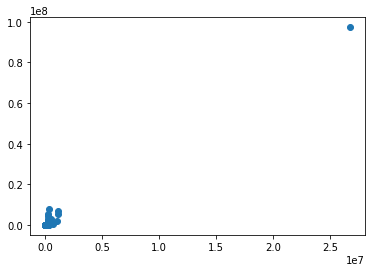

In [43]:
## show data plot with Total
import numpy as np
import matplotlib.pyplot as plt

x = data[:,1]
y = data[:,2]

plt.scatter(x,y)
plt.show()

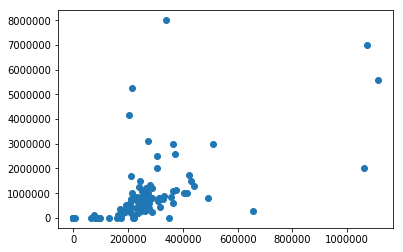

In [44]:
del my_dataset['TOTAL']
features_list = ['poi',
                 'salary',
                 'bonus',
                 'to_messages',
                 'deferral_payments',
                 'total_payments',
                 'exercised_stock_options',
                 'restricted_stock',
                 'shared_receipt_with_poi',
                 'restricted_stock_deferred',
                 'total_stock_value',
                 'expenses',
                 'loan_advances',
                 'director_fees',
                 'deferred_income',
                 'long_term_incentive',
                 'from_poi_to_this_person',
                 'from_this_person_to_poi']
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
    
x = data[:,1]
y = data[:,2]

plt.scatter(x,y)
plt.show()

从图中可见数据点分布清晰了很多。

### 数据初步探查
接下来我尝试使用pandas对数据集进行初步的研究。

In [45]:
## 引入pandas模块，并创建DataFrame开始分析数据
import pandas as pd
df = pd.DataFrame(data)
len(df) # 数据集长度

144

In [46]:
pd.isnull(df).sum() # 值为空的数据点

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

由于使用的featureFormat函数，所以值为NaN的数据点全部转化为0。所以不存在空值。

In [47]:
(df == 0 ).sum()

0     126
1      50
2      63
3      58
4     106
5      20
6      43
7      35
8      58
9     127
10     19
11     50
12    141
13    128
14     96
15     79
16     70
17     78
dtype: int64

可以发现144条记录，其中有近5个字段有超过三分之二的数据是零。在选择特征数据的时候应该加以考量。

In [48]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,144.000000,1.440000e+02,1.440000e+02,144.000000,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,144.000000,1.440000e+02,1.440000e+02,144.000000,1.440000e+02,144.000000,1.440000e+02,1.440000e+02,144.000000,144.000000
mean,0.125000,1.854460e+05,6.759974e+05,1238.555556,2.220896e+05,2.259057e+06,2.075802e+06,8.685363e+05,702.611111,7.341790e+04,2.909786e+06,35375.340278,5.828125e+05,9980.319444,-1.936833e+05,3.369578e+05,38.756944,24.625000
std,0.331873,1.970421e+05,1.233155e+06,2237.564816,7.541013e+05,8.846594e+06,4.795513e+06,2.016572e+06,1077.290736,1.301983e+06,6.189018e+06,45309.303038,6.794472e+06,31300.575144,6.060111e+05,6.871826e+05,74.276769,79.778266
min,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.025000e+05,0.000000e+00,0.000000e+00,-2.604490e+06,0.000000,-1.787380e+06,-4.409300e+04,0.000000,0.000000e+00,0.000000,-3.504386e+06,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,9.964825e+04,0.000000e+00,2.434500e+04,0.000000,0.000000e+00,2.443265e+05,0.000000,0.000000e+00,0.000000,-3.708600e+04,0.000000e+00,0.000000,0.000000
50%,0.000000,2.105960e+05,3.000000e+05,347.500000,0.000000e+00,9.413595e+05,6.082935e+05,3.605280e+05,114.000000,0.000000e+00,9.659550e+05,20182.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.000000,0.000000
75%,0.000000,2.696675e+05,8.000000e+05,1623.000000,8.535500e+03,1.945668e+06,1.683580e+06,7.374560e+05,933.750000,0.000000e+00,2.295176e+06,53328.250000,0.000000e+00,0.000000,0.000000e+00,3.745862e+05,41.250000,14.000000
max,1.000000,1.111258e+06,8.000000e+06,15149.000000,6.426990e+06,1.035598e+08,3.434838e+07,1.476169e+07,5521.000000,1.545629e+07,4.911008e+07,228763.000000,8.152500e+07,137864.000000,0.000000e+00,5.145434e+06,528.000000,609.000000


光从这些数据的分布，无法研究出数据与嫌疑人身份的关联性，所以我将开始使用机器学习的方法，来对这些数据进行分析。

## 特征工程准备

我计划在feature list中覆盖尽可能多的特征，然后使用selectPercentile来进行特征筛选。所以采用的feature list如下：

In [49]:
features_list = ['poi',
                 'salary',
                 'bonus',
                 'to_messages',
                 'deferral_payments',
                 'total_payments',
                 'exercised_stock_options',
                 'restricted_stock',
                 'shared_receipt_with_poi',
                 'restricted_stock_deferred',
                 'total_stock_value',
                 'expenses',
                 'loan_advances',
                 'director_fees',
                 'deferred_income',
                 'long_term_incentive',
                 'from_poi_to_this_person',
                 'from_this_person_to_poi']
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### 特征缩放
使用MinMaxScaler对特征进行缩放。

In [50]:
# 特征缩放函数
def feature_scale(features):
    scaler = MinMaxScaler()
    features = scaler.fit_transform(features)
    return features

### 特征选择
我使用了selectPercentile，并且将函数中的percentile参数化，方便日后根据性能进行调整。

In [51]:
# 特征选择函数
def feature_selection(features,labels,selector_percentile_parameter):
    selector = SelectPercentile(f_classif, percentile = selector_percentile_parameter)
    features = selector.fit_transform(features,labels)
    return features

### 特征构造
选用了PCA函数，进行新的特征构造

In [52]:
# 特征构造
def feature_PCA(features,labels,components_parameter):
    pca = PCA(n_components=components_parameter)
    features = pca.fit_transform(features,labels)
    return features

### 数据转化
最后，我构造了一个统一的数据转化函数，可以根据参数对数据调用上述函数对数据特征进行转化：

In [53]:
# 数据转化函数
def features_transform(features,labels):
    features = feature_scale(features)
    features = feature_selection(features,labels,selector_percentile_parameter)
    features = feature_PCA(features,labels,components_parameter)
    return features

上述是特征工程所需的功能。
## 机器学习算法准备
本文尝试使用Naive Bayes，Decision Tree，SVM以及Random Forest四种算法，对数据进行分析，首先，我搭建了一个统一的算法函数，可以通过设置参数选择对应的算法。

In [54]:
# GridSearch_test用以控制是否通过GridSearch寻找合适的参数，函数中的各个算法参数都是经过试验获得的，后文会详细展示试验过程。
# 通过输入不同的函数名选用不同的参数 "NB","Decision Tree","Random Forest","SVM"

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def classifier(algorithm = "Decision Tree", GridSearch_test = False):
    if algorithm == 'NB':
        ## GaussianNB
        clf = GaussianNB()
    elif algorithm == 'Decision Tree':
        ## Decision Tree
        clf = DecisionTreeClassifier(criterion = "entropy",max_depth = 2,min_samples_leaf = 9)  
        if GridSearch_test:
            parameters = {'criterion':["entropy","gini"],'max_depth':(1,10,1),'min_samples_leaf':(1,200,10)}
            clf = GridSearchCV(clf,parameters)
    elif algorithm == 'Random Forest':
        ## Random Forest
        clf = RandomForestClassifier(n_estimators = 3)
        if GridSearch_test:
            parameters = {'n_estimators':[1,10]}
            clf = GridSearchCV(clf,parameters)
    elif algorithm == 'SVM':
        clf = SVC(C=1,gamma = 1)
        if GridSearch_test:
            parameters = {'C':[0.001, 0.01, 0.1, 1, 10],
            "gamma":[0.001, 0.01, 0.1, 1]}
            clf = GridSearchCV(clf, parameters)
    return clf

clf = classifier()

## 算法评估准备
首先我定义了评估的函数。

In [55]:
# 当print_score 为 Ture时，打印算法的accuracy，precision和recall
def calculate_score(clf,features,labels,print_score = False):
    ## import precision score evaluation
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    
    accuracy = accuracy_score(clf.predict(features),labels)
    precision = precision_score(clf.predict(features),labels)
    recall = recall_score(clf.predict(features),labels)
    
    if print_score:
        print clf
        print "accuracy score: {}".format(accuracy)
        print "precision score: {}".format(precision)
        print "recall score: {}".format(recall)
    
    scores = {"accuracy":accuracy,
           "precision":precision,
           "recall":recall
            }
    return scores

最初我选用了简单的train_test_split，进行算法性能评估。

In [56]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.4, random_state=42)
clf = classifier()
clf = clf.fit(features_train,labels_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

calculate_score(clf,features_test,labels_test,True)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=9,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
accuracy score: 0.844827586207
precision score: 0.428571428571
recall score: 0.375


{'accuracy': 0.84482758620689657,
 'precision': 0.42857142857142855,
 'recall': 0.375}

后来我发现这样测算的准确率与最后tester中运行的检测结果相差很多。所以我改用kfold，取score平局值进行评估。

In [57]:
# 搭建kfold测试数据组
from sklearn.model_selection import KFold
kf = KFold(10)
cv = kf.split(features)
accuracy_list = []
precision_list = []
recall_list = []
for train_index,test_index in cv:
    features_train = [features[ii] for ii in train_index]
    features_test = [features[ii] for ii in test_index]
    labels_train = [labels[ii] for ii in train_index]
    labels_test = [labels[ii] for ii in test_index]
    clf.fit(features_train,labels_train)
    score = calculate_score(clf,features_test,labels_test) # 计算每个数据组的数据情况，并且添加到对应list中
    accuracy_list.append(score['accuracy'])
    precision_list.append(score['precision'])
    recall_list.append(score['recall'])
# 计算各个list的均值
print clf
print "average accuracy:{}".format(sum(accuracy_list)/len(accuracy_list))
print "precision accuracy:{}".format(sum(precision_list)/len(precision_list))
print "recall accuracy:{}".format(sum(recall_list)/len(recall_list))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=9,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
average accuracy:0.868571428571
precision accuracy:0.183333333333
recall accuracy:0.3


最后我发现这样的评估效果是会好一些，但是还是不及tester中的评估效果。所以我最后复用了tester中的语句进行评估。

In [58]:
accuracy = []
precision = []
recall = []

true_negatives = 0
false_negatives = 0
true_positives = 0
false_positives = 0


PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

folds = 1000

# 
from sklearn.cross_validation import StratifiedShuffleSplit

def test_classifier(clf, dataset, feature_list,transform = True):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        ### feature engineer the features
        if transform:
            features_train = features_transform(features_train,labels_train)
        clf.fit(features_train, labels_train)
        ### transform test features
        if transform:
            features_test = features_transform(features_test,labels_test)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break

    try:
        
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

test_classifier(clf, my_dataset, features_list,transform = False)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=9,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.87160	Precision: 0.52812	Recall: 0.34750	F1: 0.41918	F2: 0.37301
	Total predictions: 15000	True positives:  695	False positives:  621	False negatives: 1305	True negatives: 12379



## 参数调整
首先，我使用GridSearchCV，对各种算法的参数进行了调整：
### GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV
clf = classifier("Decision Tree",GridSearch_test = True)
clf.fit(features_train,labels_train)
print clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [60]:
clf = DecisionTreeClassifier(criterion = "entropy",max_depth = 1,min_samples_leaf = 2)  
test_classifier(clf, my_dataset, features_list,transform = False)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.85800	Precision: 0.00758	Recall: 0.00050	F1: 0.00094	F2: 0.00061
	Total predictions: 15000	True positives:    1	False positives:  131	False negatives: 1999	True negatives: 12869



In [61]:
clf = classifier("Random Forest",GridSearch_test = True)
clf.fit(features_train,labels_train)
print clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [62]:
clf = RandomForestClassifier(n_estimators = 2)  
test_classifier(clf, my_dataset, features_list,transform = False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.84960	Precision: 0.30368	Recall: 0.09900	F1: 0.14932	F2: 0.11442
	Total predictions: 15000	True positives:  198	False positives:  454	False negatives: 1802	True negatives: 12546



In [63]:
clf = classifier("SVM",GridSearch_test = True)
clf.fit(features_train,labels_train)
print clf.best_estimator_

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [64]:
clf = SVC(C=0.001,gamma=0.001)  
test_classifier(clf, my_dataset, features_list,transform = False)

Got a divide by zero when trying out: SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Precision or recall may be undefined due to a lack of true positive predicitons.


从上述的几次测试来看GridSearch都没有达到比较好的效果。所以我最后采用了手动调整的方法，手动调整各个算法中的参数，以及选用特征的比例（feature_selection：selector_percentile），和构造新特征的个数（PCA：components）。
### 手动调整
手动调整算法参数以及特征参数的结果如下：
#### Decision Tree
algorithm	Kenel	components	selector_percentile	result											
Decision Tree	criterion = "entropy",max_depth = 2,min_samples_leaf = 9	None	None	Accuracy: 0.87213       Precision: 0.53135      Recall: 0.34750 F1: 0.42019     F2: 0.37333											
Decision Tree	criterion = "entropy",max_depth = 2,min_samples_leaf = 9	2	15	Accuracy: 0.83807       Precision: 0.31960      Recall: 0.19000 F1: 0.23832     F2: 0.20677											
Decision Tree	criterion = "entropy",max_depth = 2,min_samples_leaf = 9	2	20	Accuracy: 0.84773       Precision: 0.39605      Recall: 0.27050 F1: 0.32145     F2: 0.28881											
Decision Tree	criterion = "entropy",max_depth = 2,min_samples_leaf = 9	2	30	Accuracy: 0.84193       Precision: 0.40283      Recall: 0.38450 F1: 0.39345     F2: 0.38803											
Decision Tree	criterion = "entropy",max_depth = 2,min_samples_leaf = 9	2	35	Accuracy: 0.83027       Precision: 0.36773      Recall: 0.37950 F1: 0.37352     F2: 0.37709											
Decision Tree	criterion = "entropy",max_depth = 2,min_samples_leaf = 9	3	35	Accuracy: 0.83040       Precision: 0.36640      Recall: 0.37300 F1: 0.36967     F2: 0.37166											
Decision Tree	criterion = "gini",max_depth = 2,min_samples_leaf = 9	None	None	Accuracy: 0.85673       Precision: 0.42375      Recall: 0.20700 F1: 0.27813     F2: 0.23059											
Decision Tree	criterion = "gini",max_depth = 2,min_samples_leaf = 9	2	50	Accuracy: 0.83053       Precision: 0.29563      Recall: 0.19600 F1: 0.23572     F2: 0.21017											
Decision Tree	criterion = "gini",max_depth = 2,min_samples_leaf = 9	2	30	Accuracy: 0.83753       Precision: 0.39590      Recall: 0.41550 F1: 0.40546     F2: 0.41143											
Decision Tree	criterion = "gini",max_depth = 2,min_samples_leaf = 9	2	35	Accuracy: 0.82820       Precision: 0.36411      Recall: 0.38650 F1: 0.37497     F2: 0.38180											
Decision Tree	criterion = "gini",max_depth = 2,min_samples_leaf = 9	2	20	Accuracy: 0.84167       Precision: 0.38404      Recall: 0.31050 F1: 0.34338     F2: 0.32287											
Decision Tree	criterion = "gini",max_depth = 2,min_samples_leaf = 9	3	30	Accuracy: 0.84327       Precision: 0.39147      Recall: 0.31650 F1: 0.35001     F2: 0.32910											
Decision Tree	criterion = "gini",max_depth = 3,min_samples_leaf = 10	3	30	Accuracy: 0.83147       Precision: 0.35085      Recall: 0.31050 F1: 0.32944     F2: 0.31781											
Decision Tree	criterion = "gini",max_depth = 3,min_samples_leaf = 5	3	30	Accuracy: 0.83600       Precision: 0.37920      Recall: 0.36100 F1: 0.36988     F2: 0.36450											
Decision Tree	criterion = "gini",max_depth = 2,min_samples_leaf = 3	3	30	Accuracy: 0.84953 Precision: 0.40031 Recall: 0.25800 F1: 0.31377 F2: 0.27775											
Decision Tree	criterion = "gini",max_depth = 1,min_samples_leaf = 3	3	30	Accuracy: 0.85747       Precision: 0.43658      Recall: 0.23750 F1: 0.30764     F2: 0.26133											
Decision Tree	criterion = "gini",max_depth = 3,min_samples_leaf = 3	3	30	Accuracy: 0.83133       Precision: 0.36269      Recall: 0.35000 F1: 0.35623     F2: 0.35247											
Decision Tree	criterion = "gini",max_depth = 3,min_samples_leaf = 3	2	30	Accuracy: 0.83907       Precision: 0.38774      Recall: 0.35750 F1: 0.37201     F2: 0.36317											
Decision Tree	criterion = "gini",max_depth = 3,min_samples_leaf = 9	2	30	Accuracy: 0.83367 Precision: 0.38896 Recall: 0.43350 F1: 0.41003 F2: 0.42380				

最终得出参数criterion = "entropy",max_depth = 2,min_samples_leaf = 9 无需feature engineer

In [65]:
clf = DecisionTreeClassifier(criterion = "entropy",max_depth = 2,min_samples_leaf = 9)  
test_classifier(clf, my_dataset, features_list,transform = False)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=9,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.87180	Precision: 0.52932	Recall: 0.34750	F1: 0.41956	F2: 0.37313
	Total predictions: 15000	True positives:  695	False positives:  618	False negatives: 1305	True negatives: 12382



#### Naive Bayes
algorithm	Kenel	components	selector_percentile	result											
Naive Bayes	default	None	None	Accuracy: 0.41907       Precision: 0.17274      Recall: 0.88600 F1: 0.28912     F2: 0.48527											
Naive Bayes	default	1	7	Accuracy: 0.78787 Precision: 0.35422 Recall: 0.71800 F1: 0.47440 F2: 0.59565											
Naive Bayes	default	1	20	Accuracy: 0.79787       Precision: 0.36576      Recall: 0.70300 F1: 0.48118     F2: 0.59355											
Naive Bayes	default	1	40	Accuracy: 0.82560       Precision: 0.39761      Recall: 0.59800 F1: 0.47764     F2: 0.54324											
Naive Bayes	default	2	40	Accuracy: 0.73493       Precision: 0.30582      Recall: 0.77800 F1: 0.43905     F2: 0.59444											
Naive Bayes	default	2	50	Accuracy: 0.72813       Precision: 0.29996      Recall: 0.77900 F1: 0.43314     F2: 0.59042											
Naive Bayes	default	3	50	Accuracy: 0.68320       Precision: 0.27097      Recall: 0.81400 F1: 0.40659     F2: 0.58110											
Naive Bayes	default	5	50	Accuracy: 0.65707       Precision: 0.25696      Recall: 0.83100 F1: 0.39254     F2: 0.57437											
Naive Bayes	default	2	30	Accuracy: 0.78520       Precision: 0.35954      Recall: 0.78200 F1: 0.49260     F2: 0.63320											
Naive Bayes	default	2	20	Accuracy: 0.76640       Precision: 0.33723      Recall: 0.77900 F1: 0.47069     F2: 0.61727											
Naive Bayes	default	2	15	Accuracy: 0.61747       Precision: 0.23414      Recall: 0.82300 F1: 0.36456     F2: 0.54757											
Naive Bayes	default	1	5	Accuracy: 0.78787       Precision: 0.35422      Recall: 0.71800 F1: 0.47440     F2: 0.59565											
Naive Bayes	default	1	35	Accuracy: 0.84280       Precision: 0.43819      Recall: 0.63450 F1: 0.51838     F2: 0.58232											
  
最终得出参数component:1, selector_percentile:35

In [66]:
selector_percentile_parameter = 35
components_parameter = 1
clf = clf = GaussianNB()
test_classifier(clf, my_dataset, features_list,transform = True)

GaussianNB(priors=None)
	Accuracy: 0.84280	Precision: 0.43819	Recall: 0.63450	F1: 0.51838	F2: 0.58232
	Total predictions: 15000	True positives: 1269	False positives: 1627	False negatives:  731	True negatives: 11373



#### Random Forest
algorithm	Kenel	components	selector_percentile	result											
Random Forest	n_estimators = 3	None	None	Accuracy: 0.83513       Precision: 0.33167      Recall: 0.23300 F1: 0.27372     F2: 0.24774											
Random Forest	n_estimators = 4	None	None	Accuracy: 0.85640       Precision: 0.39895      Recall: 0.15200 F1: 0.22013     F2: 0.17348											
Random Forest	n_estimators = 2	None	None	Accuracy: 0.85107       Precision: 0.31429      Recall: 0.09900 F1: 0.15057     F2: 0.11472											
Random Forest	n_estimators = 3	2	30	Accuracy: 0.81733       Precision: 0.34910      Recall: 0.42800 F1: 0.38455     F2: 0.40949											
Random Forest	n_estimators = 3	2	50	Accuracy: 0.78453       Precision: 0.28611      Recall: 0.41200 F1: 0.33770     F2: 0.37868											
Random Forest	n_estimators = 3	2		Accuracy: 0.78693       Precision: 0.28427      Recall: 0.39400 F1: 0.33026     F2: 0.36576											
Random Forest	n_estimators = 3	2	20	Accuracy: 0.82800       Precision: 0.38725      Recall: 0.49800 F1: 0.43570     F2: 0.47106											
Random Forest	n_estimators = 3	2	10	Accuracy: 0.78373       Precision: 0.31749      Recall: 0.54100 F1: 0.40015     F2: 0.47423											
Random Forest	n_estimators = 3	3	20	Accuracy: 0.81200       Precision: 0.34182      Recall: 0.44300 F1: 0.38589     F2: 0.41824											
Random Forest	n_estimators = 3	1	20	Accuracy: 0.87387       Precision: 0.52373      Recall: 0.59600 F1: 0.55753     F2: 0.57999											
Random Forest	n_estimators = 3	1	10	Accuracy: 0.87987       Precision: 0.54925      Recall: 0.55200 F1: 0.55062     F2: 0.55145											
Random Forest	n_estimators = 3	1	5	Accuracy: 0.88547       Precision: 0.57860      Recall: 0.51900 F1: 0.54718     F2: 0.52992											
Random Forest	n_estimators = 3	1	7	Accuracy: 0.89107       Precision: 0.59150      Recall: 0.59150 F1: 0.59150     F2: 0.59150								
最终得出参数component:1, selector_percentile:7 n_estimators = 3

In [67]:
components_parameter = 1
selector_percentile_parameter = 5
clf = RandomForestClassifier(n_estimators = 3)
test_classifier(clf, my_dataset, features_list,transform = True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=3, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.89920	Precision: 0.63895	Recall: 0.56100	F1: 0.59744	F2: 0.57503
	Total predictions: 15000	True positives: 1122	False positives:  634	False negatives:  878	True negatives: 12366



#### SVM
algorithm	Kenel	components	selector_percentile	result											
SVM	default	None	None	Precision or recall may be undefined due to a lack of true positive predicitons.											
SVM	default	1	7	Accuracy: 0.90153       Precision: 0.83143      Recall: 0.32800 F1: 0.47042     F2: 0.37319											
SVM	default	1	20	Accuracy: 0.90727       Precision: 0.76687      Recall: 0.43750 F1: 0.55715     F2: 0.47861											
SVM	default	1	30	Accuracy: 0.90067       Precision: 0.77070      Recall: 0.36300 F1: 0.49354     F2: 0.40595											
SVM	default	2	30	Accuracy: 0.89340       Precision: 0.78279      Recall: 0.27750 F1: 0.40975     F2: 0.31864											
SVM	default	1	40	Accuracy: 0.88047       Precision: 0.62191      Recall: 0.26400 F1: 0.37066     F2: 0.29834
Total predictions: 15000        True positives:  528    False positives:  321   False negatives: 1472   True negatives: 12679											
SVM	default	1	15	Accuracy: 0.90493       Precision: 0.80728      Recall: 0.37700 F1: 0.51397     F2: 0.42198											
SVM	C=1	1	15	Accuracy: 0.90493 Precision: 0.80728 Recall: 0.37700 F1: 0.51397 F2: 0.42198											
SVM	C=10	1	15	Accuracy: 0.90493 Precision: 0.80728 Recall: 0.37700 F1: 0.51397 F2: 0.42198											
SVM	C=10	1	15	Accuracy: 0.90740       Precision: 0.69748      Recall: 0.53950 F1: 0.60840     F2: 0.56510											
SVM	C=5	1	15	Accuracy: 0.91180       Precision: 0.75939      Recall: 0.49550 F1: 0.59970     F2: 0.53251											
SVM	C=5,gama=5	1	15	Accuracy: 0.91180       Precision: 0.75939      Recall: 0.49550 F1: 0.59970     F2: 0.53251											
SVM	C=2,gama=1	1	15	Accuracy: 0.91207       Precision: 0.80213      Recall: 0.45200 F1: 0.57819     F2: 0.49523											
SVM	C=1,gama=1	1	15	Accuracy: 0.90493       Precision: 0.80728      Recall: 0.37700 F1: 0.51397     F2: 0.42198											
SVM	C=1,gama=1	1	10	Accuracy: 0.90927       Precision: 0.84615      Recall: 0.39050 F1: 0.53438     F2: 0.43763

In [68]:
components_parameter = 1
selector_percentile_parameter = 15
clf = SVC(C=1,gamma = 1)
test_classifier(clf, my_dataset, features_list,transform = True)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	Accuracy: 0.91207	Precision: 0.80213	Recall: 0.45200	F1: 0.57819	F2: 0.49523
	Total predictions: 15000	True positives:  904	False positives:  223	False negatives: 1096	True negatives: 12777



最后整体调整参数可得SVM这个算法是最优的算法，Accuracy: 0.91207	Precision: 0.80213	Recall: 0.45200	F1: 0.57819	F2: 0.49523。  
其参数为：  
- components_parameter = 1  
- selector_percentile_parameter = 15  
- C=1  
- gamma = 1  

## 问题总结

- 你在获得数据时它们是否包含任何异常值，你是如何进行处理的？【相关标准项：“数据探索”，“异常值调查”】

包含了部分异常值，一部分异常值是数据统计时产生的异常值，如Total的值，直接删除。  
还有一部分是NaN的值，通过FeatureFormat函数进行了转化，把NaN的函数变为了0值。  

- 你最终在你的 POI 标识符中使用了什么特征，你使用了什么筛选过程来挑选它们？你是否需要进行任何缩放？为什么？作为任务的一部分，你应该尝试设计自己的特征，而非使用数据集中现成的——解释你尝试创建的特征及其基本原理。（你不一定要在最后的分析中使用它，而只设计并测试它）。在你的特征选择步骤，如果你使用了算法（如决策树），请也给出所使用特征的特征重要性；如果你使用了自动特征选择函数（如 SelectBest），请报告特征得分及你所选的参数值的原因。【相关标准项：“创建新特征”、“适当缩放特征”、“智能选择功能”】

首先我添加了尽可能多的参数，可以保证在算法训练中使用到尽可能多的信息。接下来我通过SelectPercentile来选择参数，这样可以方便调节选用哪些参数，提升或减少用以训练的信息量。我使用了PCA创建了新的特征，并且用MinMax进行了特征缩放，根据调参的结果，这样做可以提升算法性能。  

- 你最终使用了什么算法？你还尝试了其他什么算法？不同算法之间的模型性能有何差异？【相关标准项：“选择算法”】  

我最终使用了SVM，我还尝试了Naive Bayes、Random Forest以及Decision Tree。Naive Bayes召回率最高，但是精准度难以提升。Random Forest通过调整可以有很高的正确率和召回率，但是相对耗时偏长。Decision Tree在使用Entrophy时，无需调整特征就可以达到很高的精准度和召回率。但是总和评判下来，SVM拥有最高的分类准确度、正确率、召回率，而且预测时间也可以接受。  

- 调整算法的参数是什么意思，如果你不这样做会发生什么？你是如何调整特定算法的参数的？（一些算法没有需要调整的参数 – 如果你选择的算法是这种情况，指明并简要解释对于你最终未选择的模型或需要参数调整的不同模型，例如决策树分类器，你会怎么做）。【相关标准项：“调整算法”】 
  
我使用了GridSearcCV进行调参，但是我发现会出现过度拟合的情况。可能的问题是样本量设置过大，导致过度拟合。最后我是通过手动调参，并且记录的方式进行调整，这样做可以结合precision和recall的情况对参数做目标性的调整，效率可以更加高。  

- 什么是验证，未正确执行情况下的典型错误是什么？你是如何验证你的分析的？【相关标准项：“验证策略”】  

典型错误就是过度拟合，在样本中表现非常好，但是在测试过程中表现就不太好。遇到这样的问题，我会适当减少训练算法的深度，减少拟合的水平。  

- 给出至少 2 个评估度量并说明每个的平均性能。解释对用简单的语言表明算法性能的度量的解读。【相关标准项：“评估度量的使用”】

precision rate：预测为嫌疑人中真正是嫌疑人的占比。即测的对不对。  
recall rate：所有嫌疑人被识别出的人的占比。即测的全不全。  

以上是对数据集的分析。其实还有很多问题没有解决：  

- 如何通过机器的方法自动调整包括特征工程在内的参数  
- 是否有其他算法，比文中所选的算法更加有效  
- 是否在数据点足够多的情况下，是否要将时间也考虑在内  

## 关于代码
本文中覆盖了所有与结果相关的代码。随文附上调参时使用的代码，参数均已设置为最优算法与参数。为了能够体现特征工程的效果，我在tester文件中添加了特征工程的相关功能，供测试使用。